>![image](JMUlogo.png)
>
> # Math 248 Computers and Numerical Algorithms
> # Hala Nelson
> # Week 11: Finding Roots of Nonlinear Functions
___

## Methods to find the roots of continuous functions: The goal is to numerically solve the nonlinear equation $f(x)=0$.

![image](Roots1.JPG)

Most of root finding methods create a sequence $\{x_0,x_1,\dots\}$ that hopefully converges to the desired root $x_r$ of a continuous function $f$ (point $x_r$ such that $f(x_r)=0$ or where the graph of $f$ meets the $x$-axis). A good numerical root finding method is one that: 1. Converges to the root. 2. Reasonably accurate. 3. Is not computationally expensive. 4. Converges in a reasonable amount of time. These four points are not independent from each other.

## Method 1- Newton's: Evaluates both $f$ and $f'$ at the point $x_n$. So $f'$ better be available and well behaved. 

Keep in mind that it is usually computationally expensive to compute the derivative numerically. So this method is good when the formula for the derivative is already available.

- **Formula**: Start at $x_0$. Then iterate: $$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_{n})}$$ 
- **Graphically**: $x_{n+1}$ is the point of intersection of the $x$-axis with the tangent to the graph of $f$ at the point $(x_n,f(x_n))$ (see the image below).
- **Derivation**: 

The equation of the tangent to the graph of $f$ at the point $(x_n,f(x_n))$ is $y=f(x_n)+f'(x_n)(x-x_n)$. 

To find the point where this tangent line meets the $x$-axis, set $y=0$ and solve for $x$. 

This will give the next point in the sequence $x_{n+1}=x_n-\frac{f(x_n)}{f'(x_{n})}$. 

The idea is that it is much easier to solve the linear equation $f(x_n)+f'(x_n)(x-x_n)=0$ than the nonlinear equation $f(x)=0$. Therefore, at each step, we *linearize* the nonlinear equation then solve for the root. 

![image](Roots2.JPG)

- **Proof of quadratic convergence of Newton's method under the right conditions on $f$, $f'$ and $f''$**: 

Start at $x_0$ in an interval $[x_r-b,x_r+b]$, with $b>0$, and assume $f$, $f'$, and $f''$ are all continuous on this interval. Also, assume that $f'(x)\neq 0$ on this interval.

Using Taylor's theorem near the point $x_n$, we have $$f(x)=f(x_n)+f'(x_n)(x-x_n)+\frac{f''(\xi_n)}{2!}(x-x_n)^2.$$ 

Let $x=x_r$, then $f(x_r)=0$, and after some algebra we get 
$$\begin{aligned}
|x_{n+1}-x_r|&=\frac{|f''(\xi_n)|}{2|f'(x_n)|}|x_n-x_r|^2,\\
&=\gamma|x_n-x_r|^2,
\end{aligned}$$
where $\xi_n\in(x_n,x_r)$, and $\gamma=\frac{|f''(\xi_n)|}{2|f'(x_n)|}$. 

Hence, if $\frac{|f''(\xi_n)|}{|f'(x_n)|}$ is bounded, or $$M=\sup_{x\in[x_r-b,x_r+b]}\frac{|f''(x)|}{2|f'(x)|}<\infty$$  

(great when the slope $|f'(x_n)|$ is large, terrible when it is near zero), and if $|x_n-x_r|$ is small ($x_n$ close enough to the root), then $|x_{n+1}-x_r|$ is much smaller than $|x_{n}-x_r|$, and the method converges rapidly (quadratically fast) to the root. 

- Think of all the cases when Newton's method fails to converge or fails to capture the root.

## Method 2- Secant: Similar to Newton's but avoids using the derivative by approximating with a nearby slope.  

- **Method**: Start with two points $x_0$, $x_1$, then iterate: $$x_{n+2}=x_{n+1}-f(x_{n+1})\frac{x_{n+1}-x_n}{f(x_{n+1})-f(x_n)}$$ 

- This method **converges linearly** $$|x_{n+1}-x_r|=C|x_{n}-x_r|, 0<C<1.$$

- **Graphical explanation and program**

![image](Roots3.JPG)
![image](Roots4.JPG)

## Method 3- Bisection: 

- This method works for any continuous function where one knows the function assumes two values of opposite signs. This means there must be a root in between them (this uses the intermediate value theorem for continuous functions). 

- **Method**: Start with an interval $[a,b]$ where you know $f(a)$ and $f(b)$ have different signs (if they don't, then choose a different interval where they do). Cut the interval in half ($d=\frac{a+b}{2}$). If $f(a)$ and $f(d)$ have different signs, then the root is there and update your interval to $[a,d]$. Else, the root is in $[d,b]$ and update to this interval. This means that at each step you are *closing in* on the root and cutting the distance to it by at least a half. Stop when you *have closed in on it enough*, after you reach a certain tolerance (when $np.absolute(a-b)<10^{-15}$).   

- This method **converges linearly** ($|x_{n+1}-x_r|=C|x_{n}-x_r|$, $0<C<1$). 

- **Graphical explanation and program (see examples below).**

## Relationship between Root Finding and Fixed Point Finding (previous week material)

**A fixed point search can always be reformulated as a root search**: Searching for a fixed point of a continuous function $g(x)$ is equivalent to searching for a root for the function $f(x)=g(x)-x$.

**A root search sometimes can be reformulated as a fixed point search and sometimes cannot**: This depends on whether you can separate $x$ a put it alone on one side of the equation. For example: $e^x+\cos x=0$ cannot be reformulated as a fixed point search, but $x+e^x-\cos x=0$ can.
___

# Assignment

## Exercise 1

Research: Can Newton's method be extended to higher dimensions? Explain.

## Exercise 2 

Research: There are so many root finding methods out there. Some are more useful or efficient than others, but it all depends on the use case. The interplay is always between accuracy, speed of convergence, and computational cost. List six different root-finding methods and write one sentence describing each.

## Exercise 3

Explain, with numbers, what it means that Newton's method converges quadratically fast to the root (of course under the right conditions on $f$, $f'$, $f''$ and the location of the starting point $x_0$). 

*Answer is in the iPad lecture notes on Canvas.*

## Exercise 4

Write a program that finds root(s) of the continuous function $$f(x)=e^x-3x^2$$ using each of the following methods:

1. Newton's: start at $x_0$, then $x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$
2. Bisection

Note that the roots that need to be captured are: $x_1\sim -0.46$, $x_2\sim 0.91$, $x_3\sim 3.73$.

When the starting point is 2, Newton's method converges to 0.910007572488709
When the starting point is 10, Newton's method converges to 3.733079028632814
When the starting point is -5, Newton's method converges to -0.45896226753694847


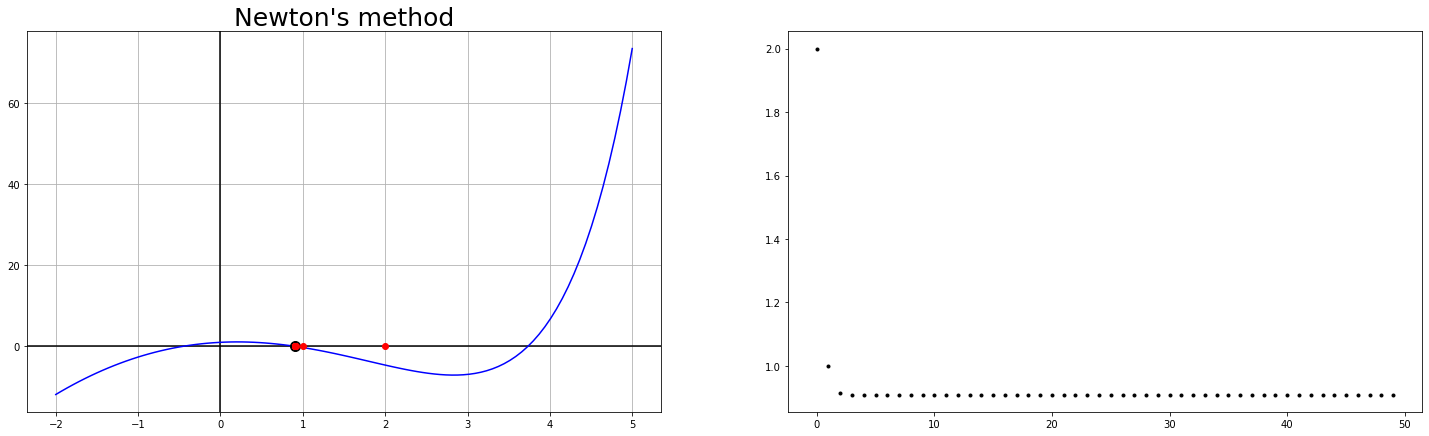

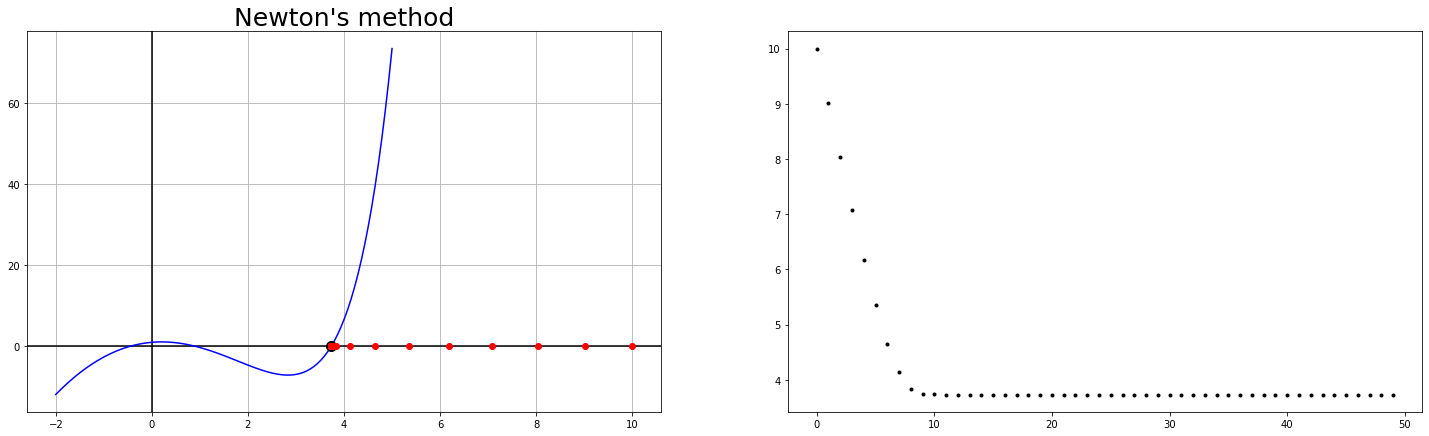

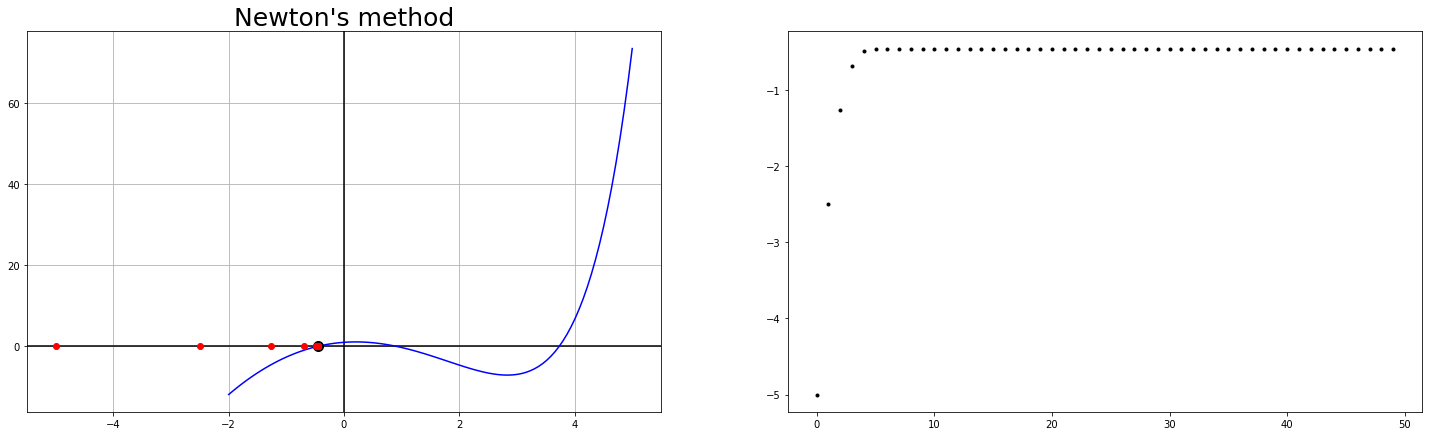

In [51]:
# Newton's Method

import numpy as np
import matplotlib.pyplot as plt 

def f(x):
    return np.exp(x)-3*x**2

def f_prime(x):
    return np.exp(x)-6*x

# let's start at 2
x=[2]
n=50
for i in range(1,n):
    a=x[len(x)-1] # the last element of x
    x.append(a-f(a)/f_prime(a))
print(f"When the starting point is {x[0]}, Newton's method converges to {x[len(x)-1]}")
# Let's visualize the sequence
# Set the figure
fig,subs=plt.subplots(nrows=1,ncols=2,figsize=(25,7))

# plot the function and the convergence of Newton's sequence on the x-axis
subs[0].grid()
subs[0].axhline(y=0, color='k') # shows the x-axis
subs[0].axvline(x=0, color='k') # shows the v-axis
subs[0].set_title("Newton's method", fontsize='25')
x1=np.linspace(-2,5,100)
subs[0].plot(x1,f(x1),'b')
subs[0].plot(x[len(x)-1],0,'k.',markersize=20)
subs[0].plot(x,np.zeros(n,),'r.',markersize=12)

# plot the sequence against its index
subs[1].plot(x,'k.')

# let's start at 10
x=[10]
n=50
for i in range(1,n):
    a=x[len(x)-1] # the last element of x
    x.append(a-f(a)/f_prime(a))
print(f"When the starting point is {x[0]}, Newton's method converges to {x[len(x)-1]}")
# Let's visualize the sequence
# Set the figure
fig,subs=plt.subplots(nrows=1,ncols=2,figsize=(25,7))

# plot the function and the convergence of Newton's sequence on the x-axis
subs[0].grid()
subs[0].axhline(y=0, color='k') # shows the x-axis
subs[0].axvline(x=0, color='k') # shows the v-axis
subs[0].set_title("Newton's method", fontsize='25')
x1=np.linspace(-2,5,100)
subs[0].plot(x1,f(x1),'b')
subs[0].plot(x[len(x)-1],0,'k.',markersize=20)
subs[0].plot(x,np.zeros(n,),'r.',markersize=12)

# plot the sequence against its index
subs[1].plot(x,'k.')

# let's start at -5
x=[-5]
n=50
for i in range(1,n):
    a=x[len(x)-1] # the last element of x
    x.append(a-f(a)/f_prime(a))
print(f"When the starting point is {x[0]}, Newton's method converges to {x[len(x)-1]}")
# Let's visualize the sequence
# Set the figure
fig,subs=plt.subplots(nrows=1,ncols=2,figsize=(25,7))
# plot the function and the convergence of Newton's sequence on the x-axis
subs[0].grid()
subs[0].axhline(y=0, color='k') # shows the x-axis
subs[0].axvline(x=0, color='k') # shows the y-axis
subs[0].set_title("Newton's method", fontsize='25')
x1=np.linspace(-2,5,100)
subs[0].plot(x1,f(x1),'b')
subs[0].plot(x[len(x)-1],0,'k.',markersize=20)
subs[0].plot(x,np.zeros(n,),'r.',markersize=12)

# plot the sequence against its index
subs[1].plot(x,'k.')

# For the bisection method, see last exercise below. 

# Exercise 5

Write a program that outputs a graph that explains how the secant method works. This is not about programing the secant method itself, just plotting a function and the secant lines explaining the idea behind the secant method.

Text(1.96078431372549, 0.25, 'x4')

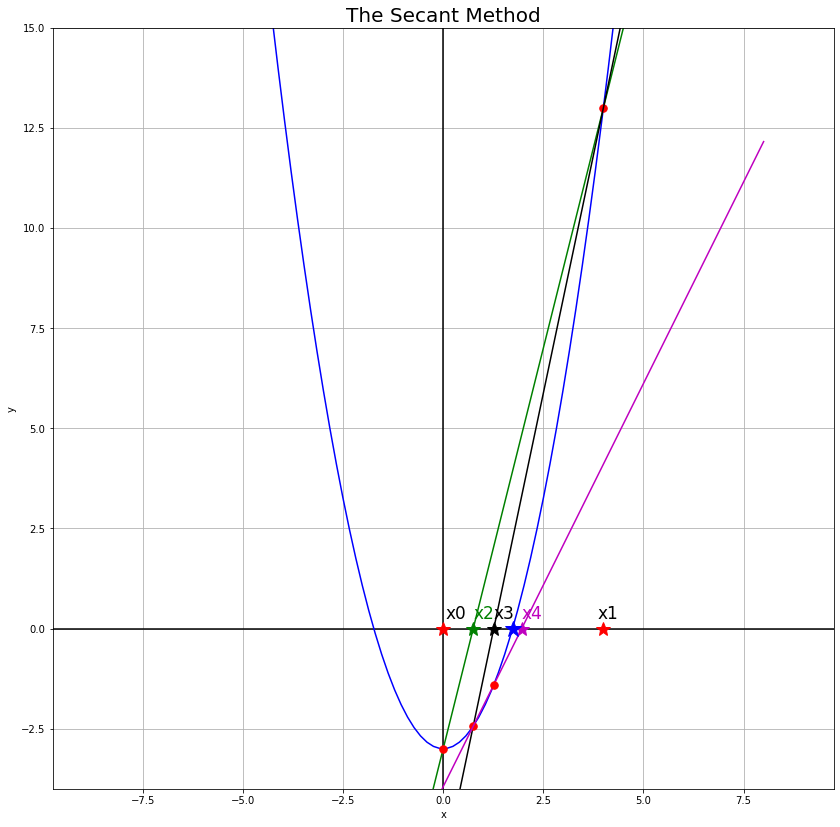

In [53]:
# Let's work on the function $f(x)=x^2-3$ 
import numpy as np
import matplotlib.pyplot as plt 

# define the function
def f(x):
    return x**2-3

# let's start at the two points (x0,f(x0)) and (x1,f(x1))
x0=0
x1=4

# equation of the secant line through points (x0,f(x0)) and (x1,f(x1))
def secant(x):
    return f(x0)+((f(x1)-f(x0))/(x1-x0))*(x-x0)

# The point of intesection between the secant line and the x-axis is:
x2= -f(x0)*((x1-x0)/(f(x1)-f(x0)))+x0

# Set the figure
plt.figure(figsize=(14,14))
plt.axis('equal') # the scale on the x-axis is the same as the y-axis
plt.xlim(-8,8)
plt.ylim(-4,15)
plt.title('The Secant Method', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k') # shows the x-axis
plt.axvline(x=0, color='k') # shows the y-axis
# show the grid
plt.grid()

# plot the function
xx=np.linspace(-8,8,100)
plt.plot(xx,f(xx),'b')

# plot the secant line
plt.plot(xx,secant(xx),'g')

# Highlight the important points
plt.plot(x0,f(x0),'r.', markersize='15')
plt.plot(x1,f(x1),'r.', markersize='15')
plt.plot(x2,0,'g*', markersize='15')

# Now repeat the same process for the points (x1,f(x1)) and (x2,f(x2))

# equation of the secant line through points (x1,f(x1)) and (x2,f(x2))
def secant(x):
    return f(x1)+((f(x2)-f(x1))/(x2-x1))*(x-x1)
# The point of intesection between the new secant line and the x-axis is:
x3= -f(x1)*((x2-x1)/(f(x2)-f(x1)))+x1

# plot the new secant line
plt.plot(xx,secant(xx),'k')

# Highlight the important points
plt.plot(x0,0,'r*', markersize='15')
plt.plot(x1,0,'r*', markersize='15')
plt.plot(x2,f(x2),'r.', markersize='15')
plt.plot(x3,0,'k*', markersize='15')

# Now repeat the same process for the points (x2,f(x2)) and (x3,f(x3))

# equation of the secant line through points (x2,f(x2)) and (x3,f(x3))
def secant(x):
    return f(x2)+((f(x3)-f(x2))/(x3-x2))*(x-x2)
# The point of intesection between the new secant line and the x-axis is:
x4= -f(x2)*((x3-x2)/(f(x3)-f(x2)))+x2

# plot the new secant line
plt.plot(xx,secant(xx),'m')

# Highlight the important points
plt.plot(x3,f(x3),'r.', markersize='15')
plt.plot(x4,0,'m*', markersize='15')

# Highlight the root this seems to be converging to:
r=np.sqrt(3)
plt.plot(r,0,'b*', markersize='17')

plt.annotate('x0',(0.05,0.25), fontsize='17')
plt.annotate('x1',(3.85,0.25), fontsize='17')
plt.annotate('x2',(x2,0.25), fontsize='17', color='g')
plt.annotate('x3',(x3,0.25), fontsize='17')
plt.annotate('x4',(x4,0.25), fontsize='17',color='m')

# Exercise 6

Write a program that approximates $\sqrt{7}$ numerically using Secant's method applied to an appropriate function (what easy continuous function $f(x)$ has root equal to $\sqrt{7}$?). After how many steps did Secant's method converge?

When the starting points are 2, and 10, Secant's method converges to 2.6457513110645907
[2, 10, 2.25, 2.4081632653061225, 2.6659364731653885, 2.644806167400881, 2.645747718746274, 2.645751311706349, 2.6457513110645903, 2.6457513110645907, 2.6457513110645907]


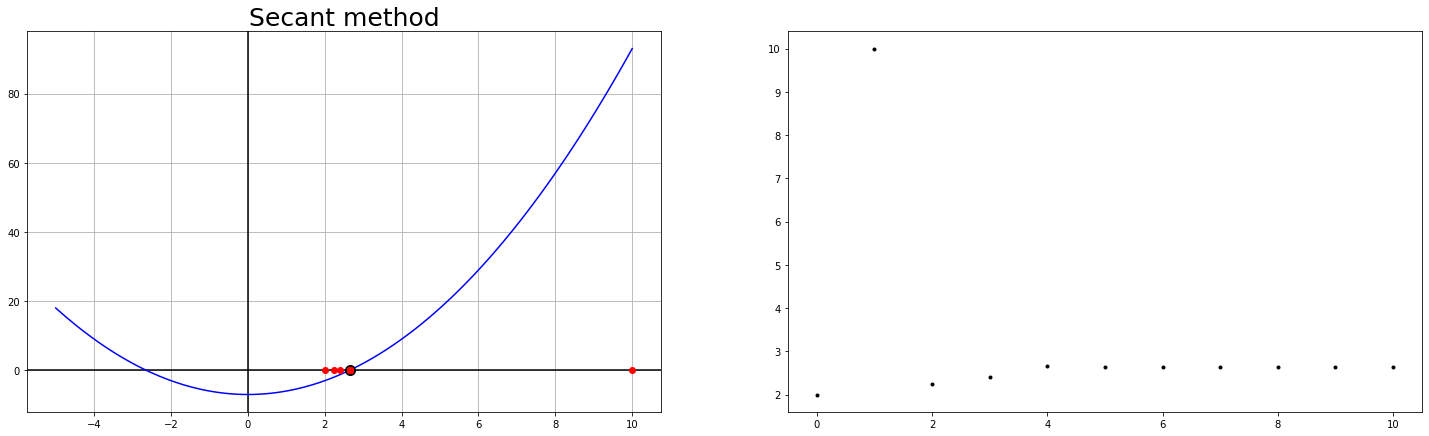

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2-7


x=[2,10]
n=10
for i in range(1,n):
    a=x[len(x)-2] # the element before the last element of the sequence x
    b=x[len(x)-1] # the last element of the sequence x
    x.append(b-f(b)*(b-a)/(f(b)-f(a)))
print(f"When the starting points are {x[0]}, and {x[1]}, Secant's method converges to {x[len(x)-1]}")

print(x)

# plot everything
fig,subs=plt.subplots(nrows=1,ncols=2,figsize=(25,7))

subs[0].grid()
subs[0].axhline(y=0, color='k')
subs[0].axvline(x=0, color='k')
subs[0].set_title("Secant method", fontsize='25')
x1=np.linspace(-5,10,100)
subs[0].plot(x1,f(x1),'b')
subs[0].plot(x[len(x)-1],0,'k.',markersize=20)
subs[0].plot(x,np.zeros(len(x)),'r.',markersize=12)

# plot the sequence against its index
subs[1].plot(x,'k.')

# Exercise 7

Write a program that uses the bisection method to approximate the positive root of $$f(x)=x^2-3$$ to within $10^{-15}$.

The left endpoint of the interval is now 1.7320508075688767
The right endpoint of the interval is now 1.7320508075688776
The midpoint of the interval is now 1.7320508075688776
The approximation of the root using the bisection method is 1.7320508075688776
We have the correct root for this function, it is $\sqrt{3}=$ 1.7320508075688772


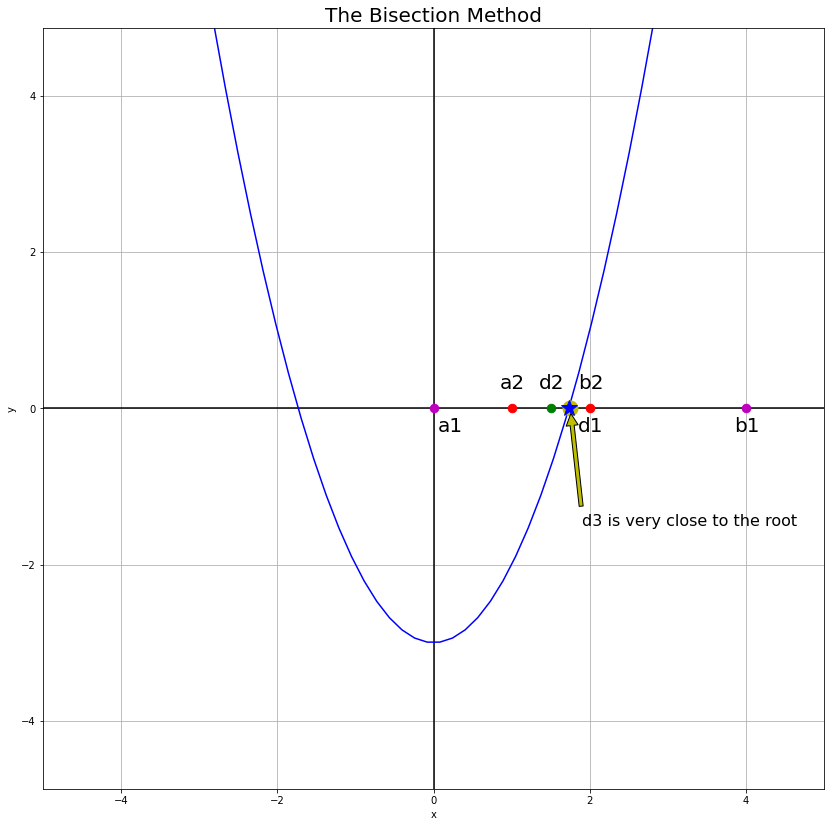

In [67]:
# Bisection Method: Let's find the positive root of $f(x)=x^2-3$
import numpy as np
import matplotlib.pyplot as plt

# define the function
def f(x):
    return x**2-3;
#  define the starting inverval [a,b]
a=0;
b=4;

while np.absolute(a-b)>10**(-15):
    if f(a)*f(b)<0:
        d=(a+b)/2
        if f(a)*f(d)<0:
            b=d
        else:
            a=d
    else:
        print('Choose a different interval that contains the root.')
        break
print('The left endpoint of the interval is now',a)
print('The right endpoint of the interval is now',b)
print('The midpoint of the interval is now',d)
print('The approximation of the root using the bisection method is',d)
print("We have the correct root for this function, it is $\sqrt{3}=$",np.sqrt(3))

# Let's plot everything
# Set the figure
plt.figure(figsize=(14,14))
plt.axis('equal') # the scale on the x-axis is the same as the y-axis
plt.xlim(-5,5)
plt.ylim(-3,3)
plt.title('The Bisection Method', fontsize=20)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(y=0, color='k') # shows the x-axis
plt.axvline(x=0, color='k') # shows the y-axis
# show the grid
plt.grid()

# plot the function
xx=np.linspace(-8,8,100)
plt.plot(xx,f(xx),'b')

# Highlight the important points
plt.plot(0,0,'m.', markersize='17')
plt.plot(4,0,'m.', markersize='17')
plt.plot(2,0,'r.', markersize='17')
plt.plot(1,0,'r.', markersize='17')
plt.plot(1.5,0,'g.', markersize='17')
plt.plot(1.75,0,'y.', markersize='30')

# label the points using annotate from matplotlib.pyplot
plt.annotate('a1',(0.05,-0.3), fontsize='20')
plt.annotate('b1',(3.85,-0.3), fontsize='20')
plt.annotate('d1',(1.85,-0.3), fontsize='20')
plt.annotate('a2',(0.85,0.25), fontsize='20')
plt.annotate('b2',(1.85,0.25), fontsize='20')
plt.annotate('d2',(1.35,0.25), fontsize='20')
plt.annotate('d3 is very close to the root', xy=(1.75, 0), xytext=(1.9,-1.5),
             arrowprops=dict(facecolor='y', shrink=0.05),fontsize='16')

# Highlight the root this seems to be converging to:
r=np.sqrt(3)
plt.plot(r,0,'b*', markersize='17')